# <span style='color:red'> Ultimate Guide to Standardization</span>

<span style='color:blue'> Standardization is a process of scaling all the values without changing the shape of the data. It is so important while working with the algorithms that works on calulating distances. like KNN, K Means, etc. But it doesn't have any significant impact whiule working with algos like Random Forest, Gradient Boost, etc.It involves two steps
- Mean Centering
- Scaling according to Standard Deviation</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_30679/265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.sample(13)

,User ID,Gender,Age,EstimatedSalary,Purchased
218,15666675,Female,46,96000,0
124,15678168,Female,41,51000,0
309,15652400,Female,38,50000,0
295,15725794,Female,36,63000,0
65,15718071,Male,24,58000,0
373,15708791,Male,59,130000,1
102,15584545,Female,32,86000,0
179,15673367,Female,31,34000,0
274,15692819,Female,57,26000,1
305,15787550,Male,42,54000,0


In [4]:
df.shape

(400, 5)

In [5]:
df = df.iloc[:, 2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
139,19,25000,0
16,47,25000,1
298,45,79000,0
253,37,146000,1
22,48,41000,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size= 0.3, random_state=0)

In [9]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [10]:
X_train.sample(5)

,Age,EstimatedSalary
112,38,61000
71,24,27000
73,33,113000
333,40,65000
115,40,57000


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
slr = StandardScaler()

In [13]:
slr.fit(X_train)

StandardScaler()

In [14]:
slr.mean_

array([3.78642857e+01, 6.98071429e+04])

In [15]:
X_train_scaled = slr.transform(X_train)
X_test_scaled = slr.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [17]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [18]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [19]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [20]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Visualize the Effect of Scaling

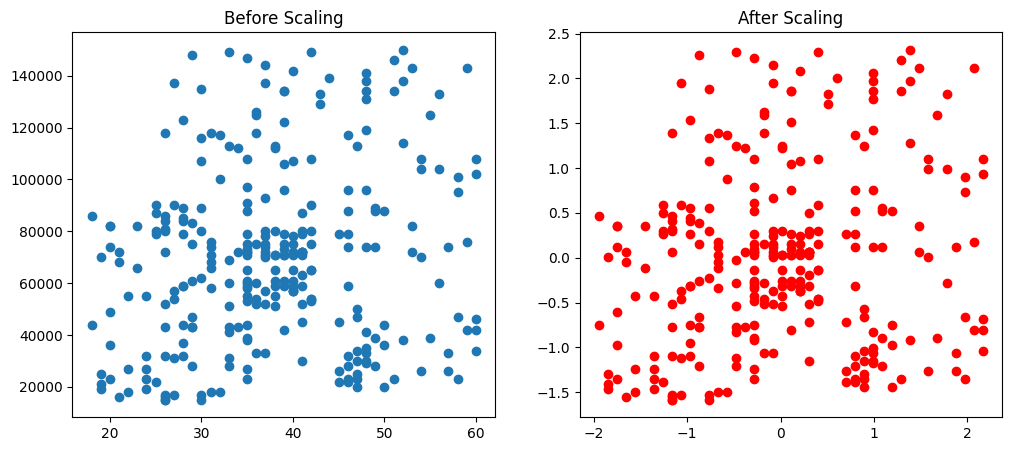

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
plt.show()

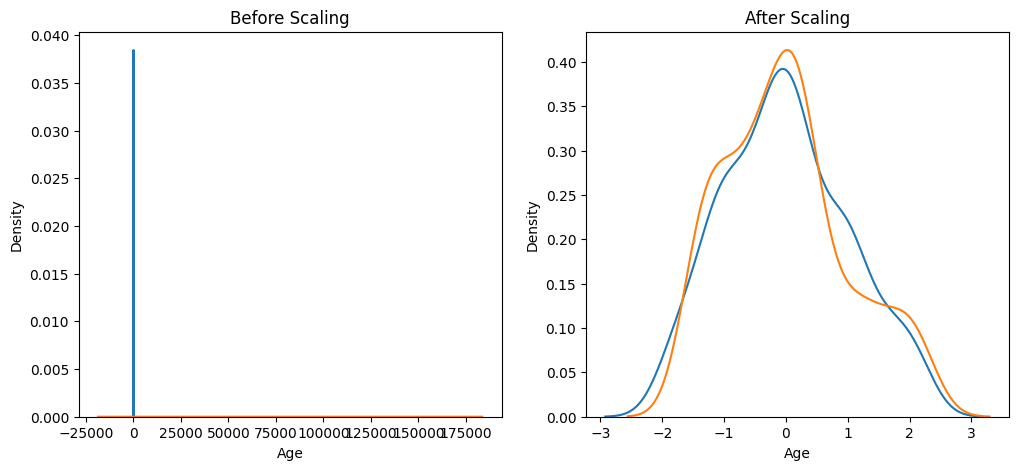

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

## Let's Compare the Data Distributions

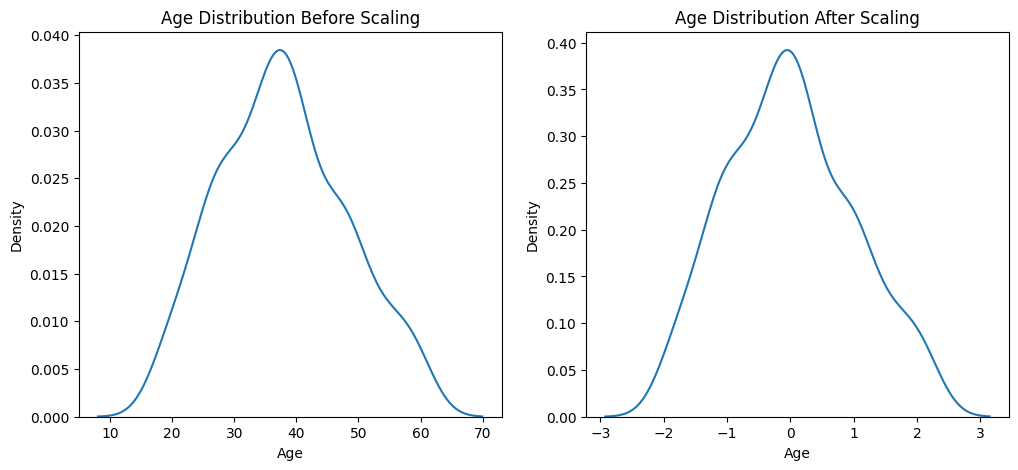

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

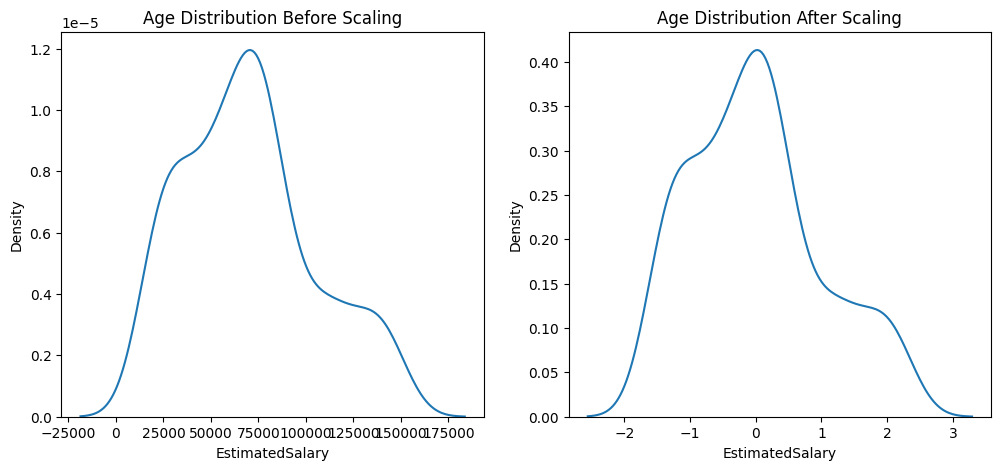

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

## But does it really affect the Model Performance?

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [27]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("Accuracy Score before Scaling: ", accuracy_score(y_test, y_pred))
print("Accuracy Score after Scaling: ", accuracy_score(y_test, y_pred_scaled))

Accuracy Score before Scaling:  0.875
Accuracy Score after Scaling:  0.8666666666666667


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [33]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dt = dt.predict(X_test)
y_pred_scaled_dt = dt_scaled.predict(X_test_scaled)

In [35]:
print("Accuracy Score before Scaling: ", accuracy_score(y_test, y_pred_dt))
print("Accuracy Score after Scaling: ", accuracy_score(y_test, y_pred_scaled_dt))

Accuracy Score before Scaling:  0.875
Accuracy Score after Scaling:  0.875


In [36]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Reaction to Outlier

In [37]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)

In [38]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


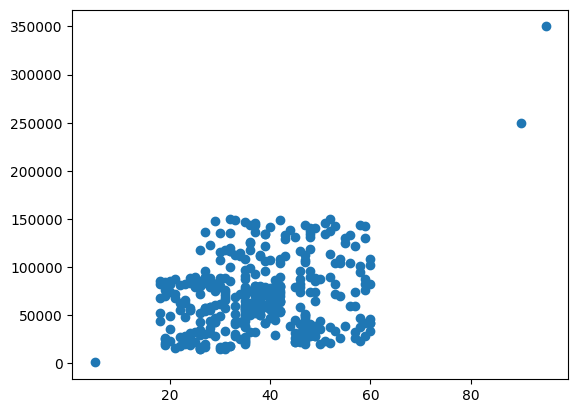

In [39]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.2, random_state=0)

In [41]:
X_train.shape, X_train.shape

((322, 2), (322, 2))

In [42]:
slr.fit(X_train)

StandardScaler()

In [43]:
X_train_scaled = slr.transform(X_train)

In [44]:
X_test_scaled = slr.transform(X_test)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

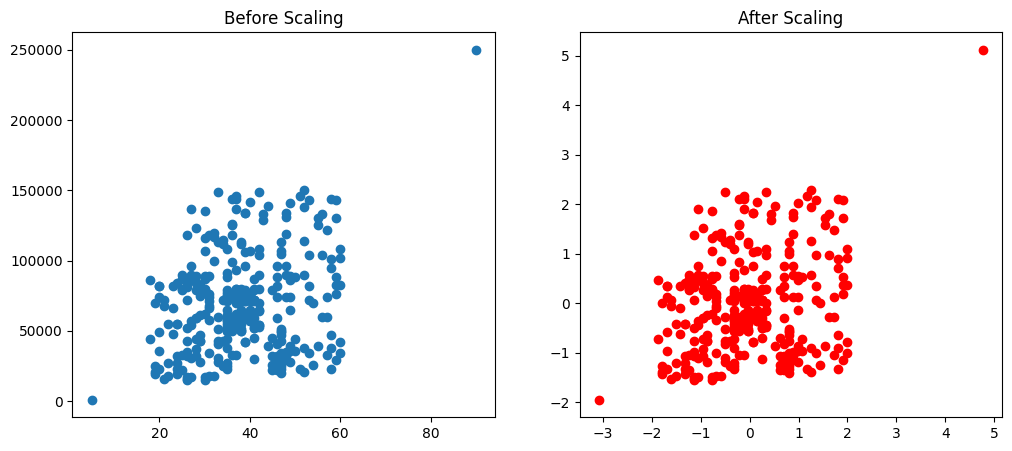

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')

plt.show()